### Project Goals
- Attempt to identify the relationship between gross domestic product (GDP) & life expectancy

### Analysis
- Analyze, Prepare, and Plot Data

In [54]:
# import the appropriate modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [55]:
# For this analysis, we will import the supplied data, explore & clean the dataset, prepare the data for plotting, and plot the data in an appropriate manner (including summary statistics).

# import data
gdp_life_expectancy = pd.read_csv('all_data.csv')

# explore dataset
# print(gdp_life_expectancy.describe(include= 'all'))
# print(gdp_life_expectancy.info())
# gdp_life_expectancy.head()

# prepare data

# format data to appropriate type and column names
gdp_life_expectancy['country'] = gdp_life_expectancy['Country'].astype(str)
gdp_life_expectancy['year'] = gdp_life_expectancy['Year'].astype(str).astype('datetime64')
gdp_life_expectancy['gdpb'] = gdp_life_expectancy['GDP'].apply(lambda x: f"${x/1000000000:,.0f}")
gdp_life_expectancy['life'] = gdp_life_expectancy['Life expectancy at birth (years)']
gdp_life_expectancy.drop(columns= ['Country', 'Year', 'Life expectancy at birth (years)'], inplace= True)
gdp_life_expectancy.head()

,GDP,country,year,gdpb,life
0,7.786093e+10,Chile,2000-01-01,$78,77.3
1,7.097992e+10,Chile,2001-01-01,$71,77.3
2,6.973681e+10,Chile,2002-01-01,$70,77.8
3,7.564346e+10,Chile,2003-01-01,$76,77.9
4,9.921039e+10,Chile,2004-01-01,$99,78.0


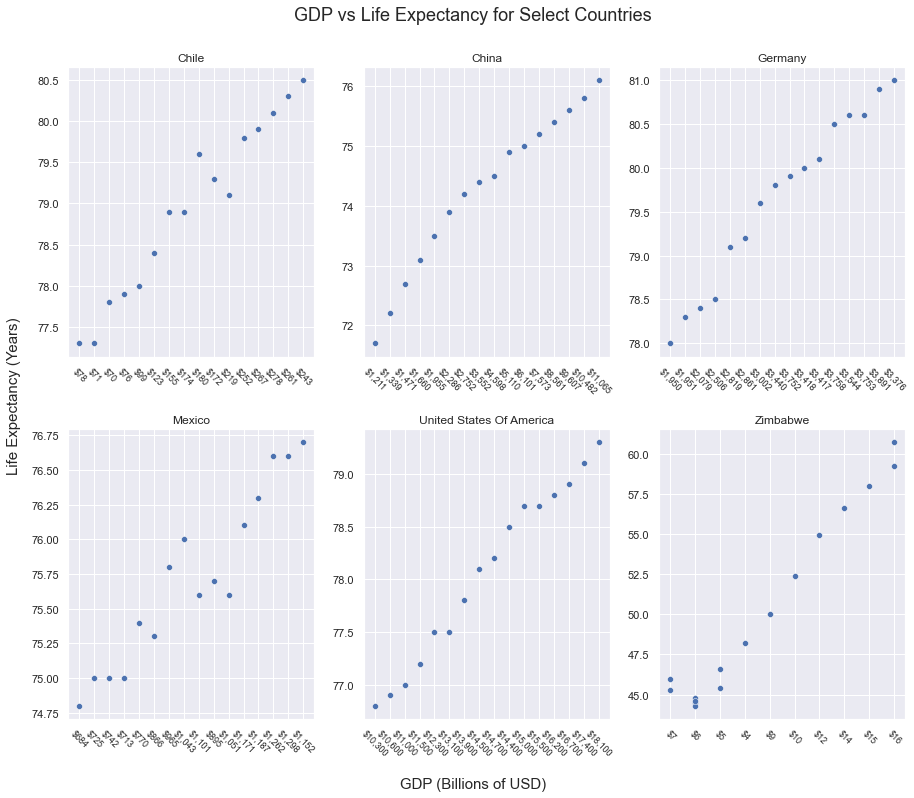

In [66]:
# plot data
countries = gdp_life_expectancy.country.unique()

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.25)
plt.suptitle("GDP vs Life Expectancy for Select Countries", fontsize=18, y=0.95)
fig.text(0.075,0.5, 'Life Expectancy (Years)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.5,0.05, 'GDP (Billions of USD)', ha="center", va="center", fontsize=15)

# loop through the length of countries and keep track of index
for n, country in enumerate(countries):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n + 1)

    # filter df and plot country's GDP and life expectancy on the new subplot axes
    gdpb = gdp_life_expectancy['gdpb'][gdp_life_expectancy['country'] == country]
    life = gdp_life_expectancy['life'][gdp_life_expectancy['country'] == country]
    sns.scatterplot(x= gdpb, y= life, ax=ax)    

    # formatting the figures & plots
    ax.set_title(country.title())
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.xticks(rotation = -45)
    ax.tick_params(axis='x', which='major', labelsize=9)


In [64]:
# display for correlation between life expectancy and GDP
for n, country in enumerate(countries):
    life = gdp_life_expectancy['life'][gdp_life_expectancy['country'] == country]
    gdp = gdp_life_expectancy['GDP'][gdp_life_expectancy['country'] == country]
    gdp_life_corr = np.corrcoef(life, gdp)[0,1]
    print(f"The correlation between GDP and life expectancy in {country.title()} is {round(gdp_life_corr, 3)}.")

The correlation between GDP and life expectancy in Chile is 0.95.
The correlation between GDP and life expectancy in China is 0.909.
The correlation between GDP and life expectancy in Germany is 0.933.
The correlation between GDP and life expectancy in Mexico is 0.932.
The correlation between GDP and life expectancy in United States Of America is 0.982.
The correlation between GDP and life expectancy in Zimbabwe is 0.966.


### Evaluation
- Create Blog